# Group 32 Project Proposal 

### Carol Dong, Aria Donthineni, Grace Ellis, Nao Kawano

### Introduction

Heart disease is considered one of the leading causes of death in the US and costs billions in terms of healthcare. Studies have shown a correlation between a low maximum heart rate and heart disease (Das & Lee, 2019). Additionally, high blood pressure damages the lining of arteries, which makes the heart susceptible to the buildup of plaque (Centers for Disease Control, 2022). Age is another factor; the older a person is, the higher the risk of developing heart disease (US Department of Health, n.d.).

This database uses data on 13 attributes of patients from a Cleveland clinic to predict the presence of heart disease. A model was created from this data, and its accuracy was then tested on patients in Hungary, California, and Switzerland.

Thus, we shall be addressing the question: *Given a patient's age, maximum heart rate, and resting blood pressure, can we predict whether the patient has a heart disease or not based on the classification model?*

In [1]:
#importing libaries 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#wrangling and tidying the data 
set.seed(1) 

heart_diseases<- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         col_names= c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

heart_diseases$sex[heart_diseases$sex == 1] <- "Male"
heart_diseases$sex[heart_diseases$sex == 0] <- "Female"
names(heart_diseases)[names(heart_diseases) == "thalach"] <- "max_hr"
names(heart_diseases)[names(heart_diseases) == "trestbps"] <- "resting_bp"


heart_diseases<- heart_diseases |> 
    mutate(diagnosis = ifelse (is.na(num), NA, (num>0))) |>
    mutate(sex= as_factor(sex), cp= as_factor(cp), fbs= as_factor(fbs), 
           restecg= as_factor(restecg), exang= as_factor(exang), 
           slope= as_factor(slope), thal= as_factor(slope), num=as_factor(num),
            diagnosis= as_factor(diagnosis))

#spliting dataframe into training and testing for data analysis  
heart_split<- initial_split(heart_diseases, prop= 0.75, strata= num)
heart_training<- training(heart_split)
heart_test<- testing(heart_split)

head(heart_training)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,resting_bp,chol,fbs,restecg,max_hr,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>
63,Male,1,145,233,1,2,150,0,2.3,3,0.0,3,0,FALSE
41,Female,2,130,204,0,2,172,0,1.4,1,0.0,1,0,FALSE
56,Female,2,140,294,0,2,153,0,1.3,2,0.0,2,0,FALSE
57,Male,3,150,168,0,0,174,0,1.6,1,0.0,1,0,FALSE
49,Male,2,130,266,0,0,171,0,0.6,1,0.0,1,0,FALSE
64,Male,1,110,211,0,2,144,1,1.8,2,0.0,2,0,FALSE


In [3]:
#summarizing table grouped by diagnosis to give insight to typical characteristics of patients based on diagnosis  

heart_summary<- heart_training |>
    group_by(diagnosis) |>
    summarize(mean_age= mean(age), min_age= min(age), max_age= max(age),
              mean_resting_bp= mean(resting_bp), min_resting_bp = min(resting_bp), max_resting_bp= max(resting_bp),
              mean_hr= mean(max_hr), min_hr = min(max_hr), max_hr= max(max_hr),
              number_patients= n())
heart_summary
        

diagnosis,mean_age,min_age,max_age,mean_resting_bp,min_resting_bp,max_resting_bp,mean_hr,min_hr,max_hr,number_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,52.68548,29,76,129.7339,94,180,158.9194,105,202,124
TRUE,56.48039,35,77,133.9020,100,192,138.4118,71,195,102


Next, we compare the three variables we are looking at using a scatterplot. By using a scatterplot, we can visually inspect if there are any relationships or trends that may exist between patients with and without heart diseases.

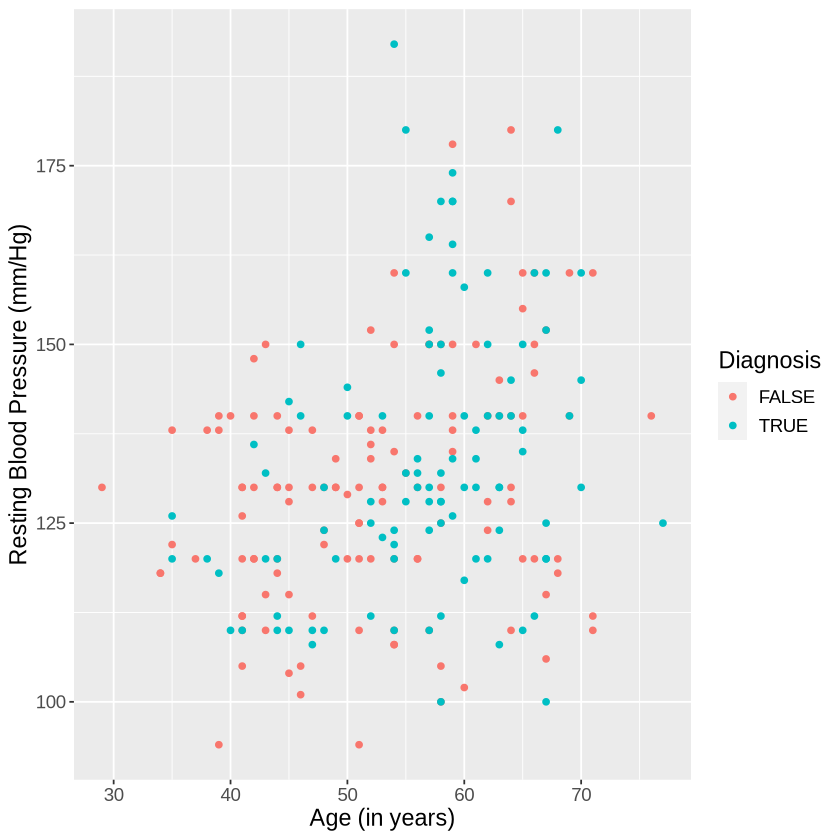

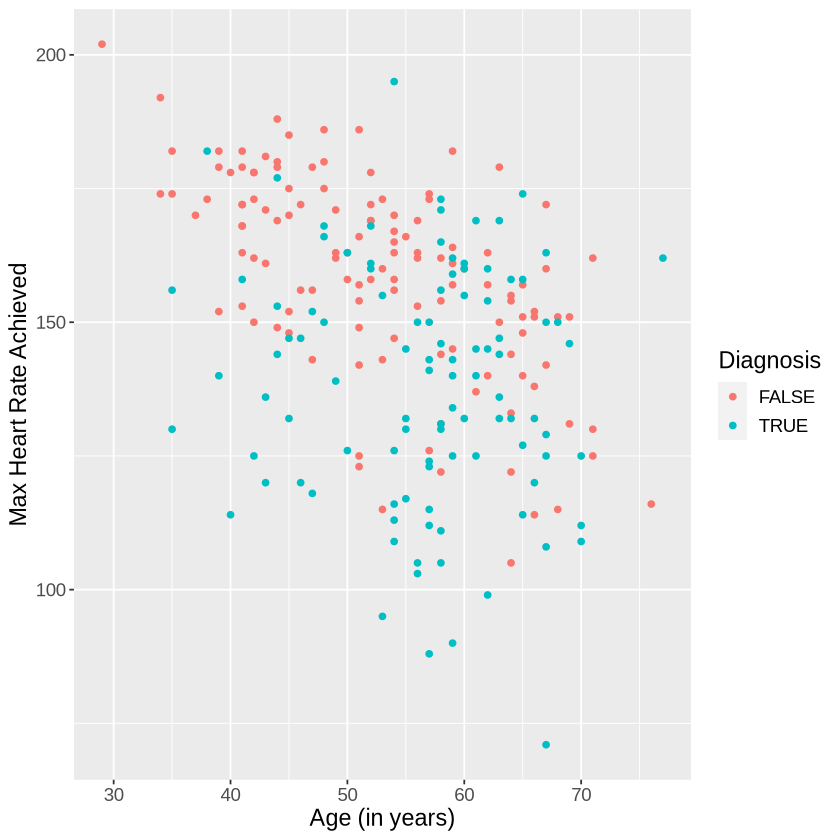

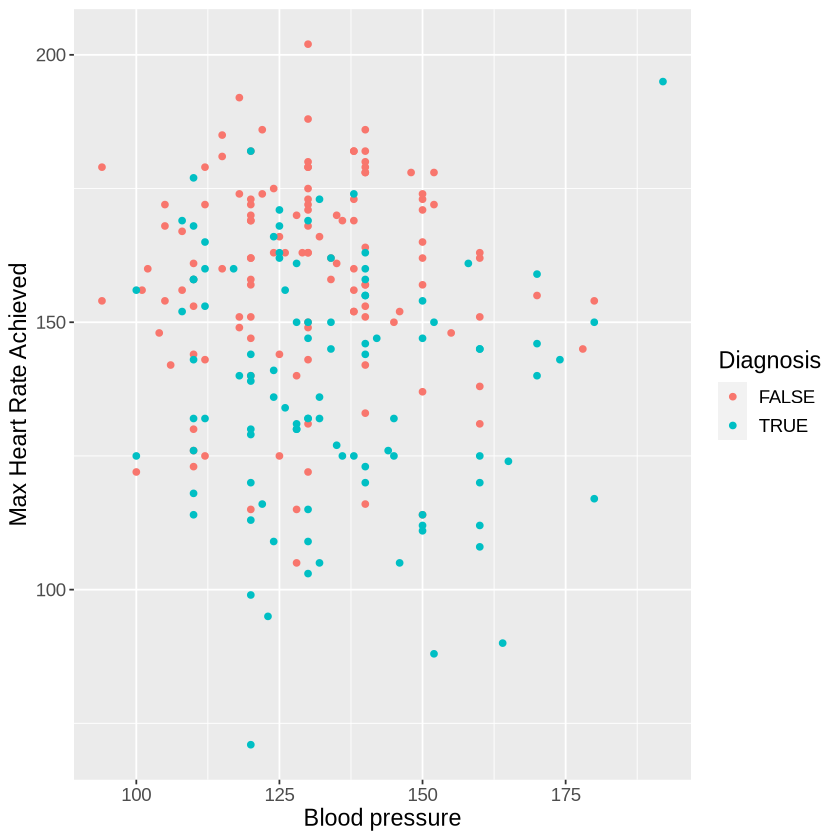

In [4]:
#visualzing the data 


plot_1<- ggplot(heart_training, aes(x=age, y=resting_bp)) +
    geom_point(aes(color=diagnosis))+
    labs(x="Age (in years)", y="Resting Blood Pressure (mm/Hg)", color= "Diagnosis") +
    theme(text = element_text(size = 14))


plot_2<- ggplot(heart_training, aes(x=age, y=max_hr)) +
    geom_point(aes(color=diagnosis))+
    labs( x="Age (in years)",y="Max Heart Rate Achieved", color= "Diagnosis") +
    theme(text = element_text(size = 14))


plot_3<- ggplot(heart_training, aes(x=resting_bp, y=max_hr)) +
    geom_point(aes(color=diagnosis))+
    labs(x="Blood pressure", y="Max Heart Rate Achieved", color= "Diagnosis") +
    theme(text = element_text(size = 14))

plot_1
plot_2
plot_3




### Methods

After loading in the data, we tidied our data to make it more readable and fit with our data analysis. 


The data was split with 75% for training and 25% for testing. We selected three variables for the predictor: age, maximum heart rate achieved, and resting blood pressure. From here, the data was then summarized in a data table to give a general overview of how the variables differed by diagnosis.. They were then visualized into scatter plots colored by diagnosis. In the scatter plot comparing age with maximum heart rate, two clear regions for TRUE and FALSE diagnoses can be seen, with similar results for the other scatter plots. 

We are going to conduct this research by using the classification model with the previously mentioned variables to create a classifier. We will evaluate the performance of our classifier and visualizing our results using a confusion matrix.

### Outcomes and Significance 


We predict that those diagnosed with heart disease are older, have lower maximum heart rates, and a higher resting blood pressure. 



The ability to predict the severity of heart disease early in individuals would reduce the cases that progressed untreated to greater severity. The creation of a model that allows a large variety of variables to be analyzed by a computer would reduce the strain on doctors, for the diagnosis of heart disease. 


Some future questions could be: 


How can we minimize heart disease with people who have these factors? 


How does the risk and severity of heart disease change depending on the severity of the factors?

### Bibliography

Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. *Centers for Disease Control and Prevention*. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity 

Das, R.N., Lee, Y. (2019) Maximum Heart Rate Influencing Factors for Cardiac Patients. *Austin Cardiol*. *4*(1): 1021. https://austinpublishinggroup.com/austin-cardiology/fulltext/cardiology-v4-id1021.pdf 

U.S. Department of Health and Human Services. (n.d.). Heart health and aging. *National Institute on Aging*. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease 